In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from analysis_utils import *

In [2]:
# 2-projection
netType = 'realNet'
net = 8
with open(f'../../Networks/networks/{netType}_{net}.json', 'r') as fl:
    HyperGraph = json.load(fl)  # HyperGraph is a list where each element is a list of numbers
# HyperGraph = [[1,2,3,4],[2,3,4,5]]
lowNet = nx.Graph()
for hedge in HyperGraph:
    for node1 in hedge:
        for node2 in hedge:
            if node1 < node2:
                # If the edge already exists, increase the weight
                if lowNet.has_edge(node1, node2):
                    lowNet[node1][node2]['weight'] += 1
                # If the edge does not exist, add the edge and initialize the weights
                else:
                    lowNet.add_edge(node1, node2, weight=1)
# lowNet.remove_edges_from(lowNet.selfloop_edges())

In [43]:
# pos3 = nx.spring_layout(lowNet, k=30, iterations=1000,      
#                     #    scale=0.1
#                        )  # 12

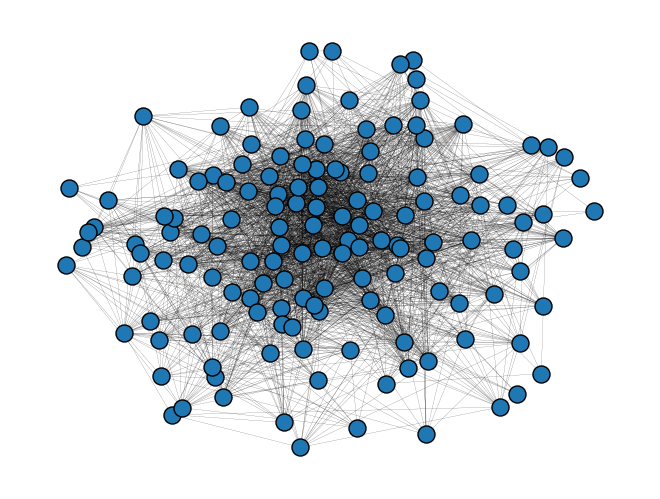

In [44]:
# width=0.1
# thres = 0.3
# node_size = 150
# nodeline=1
# nodelincolor='black'
# edgecolor='#202020'
# nx.draw(lowNet,   
#     pos=pos3,          
#     with_labels=False,
#     # with_labels=True,
#     # font_size=20,
#     width=width,
#     edge_color='black', #'dimgray',
#     linewidths=nodeline,
#     edgecolors=nodelincolor,
#     # node_size=nodesizelst[mtd][0],
#     node_size=node_size, 
#     # node_color=nodecolor_add[nu][mtd],
# )

In [45]:
# prepos3 = dict()
# for item in pos3:
#     prepos3[item]=list(pos3[item])
# with open('net8_pos2.json', 'w') as f:
#     json.dump(prepos3, f)

In [3]:
with open('net8_pos2.json', 'r') as f:
    pos3_str = json.load(f)
pos3 = dict()
for item in pos3_str:
    pos3[int(item)] = pos3_str[item]

In [4]:
mu = 1
nets_paras = {
    8:{'net':8, 'l':[1e-2, 9e-3, 5e-3, 4e-3]},
    
}
with open('nc_SIR_8_range_mu10.json', 'r') as f:
    rltfile = json.load(f)
results = dict()
i1 = dict()
for net in [8]:
    results[net] = dict()
    i1[net] = dict()
    with open(f'../../Networks/networks/realNet_{net}.json', 'r') as f:
        netfile = json.load(f)
    networkatt = NetAtrributions(netfile)
    for nu in [1,2,3,4]:
        results[net][nu] = dict()
        i1[net][nu] = dict()
        lThres = nets_paras[net]['l'][nu-1]
        for lid in [1.15]:
            # [1.2, 1.5, 1.7, 2, 2.5]:
            l = lid*lThres
            results[net][nu][lid] = dict()
            i1[net][nu][lid] = dict()
            for node in networkatt.nodes:
                results[net][nu][lid][node] = rltfile[f'n{net}_nu{nu}_l{l}_mu{mu}_ini{node}_range']
                i1[net][nu][lid][node] = rltfile[f'n{net}_nu{nu}_l{l}_mu{mu}_ini{node}_I1']


In [5]:
mu = 1
nets_paras = {
    8:{'net':8, 'lbd':[0.03,  0.05,  0.1,]},
}
maxEsize = {
    1:25, 2:81, 3:107, 4:230, 5:83, 6:99, 7:31, 8:37, 9:25, 10:16,
    11:13, 12:10, 13:7, 14:10, 15:10, 16:7, 17:124, 18:104, 19:58, 20:157
}
with open('tc_SIR_8_range_mu10.json', 'r') as f:
    rltfile_tc = json.load(f)
results_tc = dict()
i1_tc = dict()
for net in [8]:
    results_tc[net] = dict()
    i1_tc[net] = dict()
    with open(f'../../Networks/networks/realNet_{net}.json', 'r') as f:
        netfile = json.load(f)
    networkatt = NetAtrributions(netfile)
    for id,theta in enumerate([1/maxEsize[net], 1/4, 1/2]):
        lThres = nets_paras[net]['lbd'][id]
        results_tc[net][theta] = dict()
        i1_tc[net][theta] = dict()
        if lThres*10 >= 1:
            l_up = lThres*2 
        else:
            l_up = lThres*10
        for lid, lbd in [(0.7,lThres*0.7), (0.8,lThres*0.8), (0.9,lThres*0.9),(1,lThres), (1.1,lThres*1.1), (1.2,lThres*1.2),]:# [(0.1,lThres*0.1), (1,lThres), (10,l_up)]:
            results_tc[net][theta][lid] = dict()
            i1_tc[net][theta][lid] = dict()
            for node in networkatt.nodes:
                results_tc[net][theta][lid][node] = rltfile_tc[f'n{net}_theta{theta}_lbd{lbd}_mu{mu}_ini{node}_range']
                i1_tc[net][theta][lid][node] = rltfile_tc[f'n{net}_theta{theta}_lbd{lbd}_mu{mu}_ini{node}_I1']


In [6]:
def normalize_list(data):
    min_val = min(data)  
    max_val = max(data)  
    range_val = max_val - min_val  

    # (x - min) / (max - min)
    normalized_data = [(x - min_val) / range_val for x in data]
    return normalized_data

In [12]:
0.25*len(lowNet.nodes)

35.75

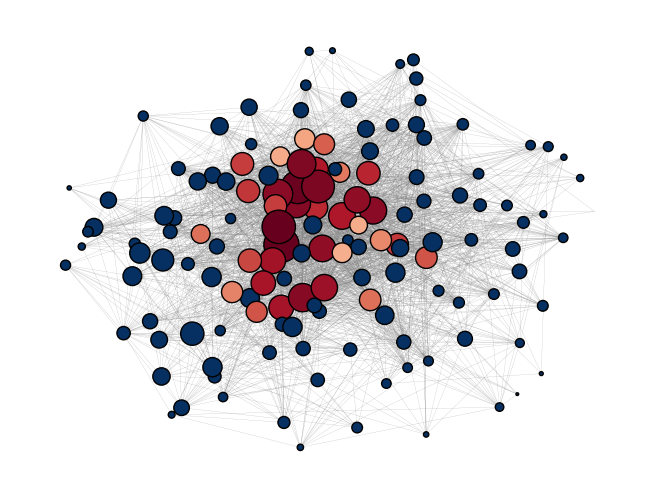

In [9]:
topk = 36
cmap = plt.cm.RdBu_r
# cmap = plt.cm.coolwarm
net = 8
nu = 1
lid = 1.15
with open(f'../../Networks/networks/realNet_{net}.json', 'r') as f:
    netfile = json.load(f)
networkatt = NetAtrributions(netfile)

sortpair1 = sorted(results[net][nu][lid].items(), key=lambda item: item[1], reverse=True)
noderank1 = [_[0] for _ in sortpair1]
nodevalue1 = [_[1] for _ in sortpair1]
nodevalue1_norm = normalize_list(nodevalue1)
sortpair1_norm = dict()
for id ,item in enumerate(noderank1):
    if id < topk:
        sortpair1_norm[item] = nodevalue1_norm[id]
    else:
        sortpair1_norm[item] = 0
nodecolor_add = [cmap(sortpair1_norm[i]) for i in lowNet.nodes]
width=0.1
thres = 0.3
bigger_size = 640
node_size = []
for node in lowNet.nodes:
    node_size.append(i1[net][nu][lid][node])
node_size_ = normalize_list(node_size)
node_size = [_*bigger_size for _ in node_size_]
nodeline=1
nodelincolor='black'
edgecolor='#202020'
nx.draw(lowNet,   
    pos=pos3,          
    with_labels=False,
    # with_labels=True,
    # font_size=20,
    width=width,
    edge_color='gray', #'dimgray',
    linewidths=nodeline,
    edgecolors=nodelincolor,
    # node_size=nodesizelst[mtd][0],
    node_size=node_size, 
    node_color=nodecolor_add,
)

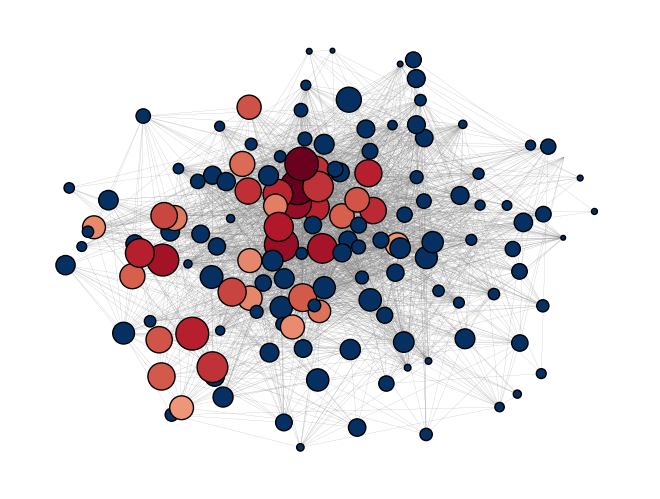

In [10]:
theta = [1/maxEsize[net], 1/4, 1/2][1]
lid = 1
sortpair3 = sorted(results_tc[net][theta][lid].items(), key=lambda item: item[1], reverse=True)
noderank3= [_[0] for _ in sortpair3]
nodevalue3 = [_[1] for _ in sortpair3]
nodevalue3_norm = normalize_list(nodevalue3)
sortpair3_norm = dict()
for id ,item in enumerate(noderank3):
    if id < topk:
        sortpair3_norm[item] = nodevalue3_norm[id]
    else:
        sortpair3_norm[item] = 0
nodecolor_add_3 = [cmap(sortpair3_norm[i]) for i in lowNet.nodes]
width=0.1
thres = 0.3
bigger_size = 640
node_size = []
for node in lowNet.nodes:
    node_size.append(i1_tc[net][theta][lid][node])
node_size_ = normalize_list(node_size)
node_size = [_*bigger_size for _ in node_size_]
nodeline=1
nodelincolor='black'
edgecolor='#202020'
nx.draw(lowNet,   
    pos=pos3,          
    with_labels=False,
    # with_labels=True,
    # font_size=20,
    width=width,
    edge_color='gray', #'dimgray',
    linewidths=nodeline,
    edgecolors=nodelincolor,
    # node_size=nodesizelst[mtd][0],
    node_size=node_size, 
    node_color=nodecolor_add_3,
)

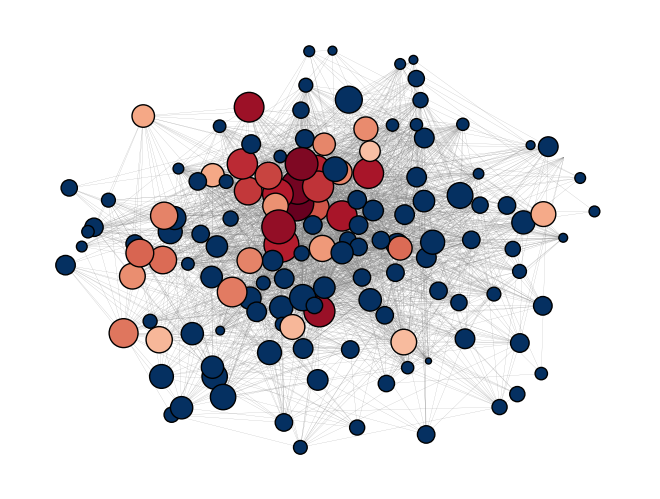

In [17]:
theta = [1/maxEsize[net], 1/4, 1/2][2]
lid = 1
sortpair3 = sorted(results_tc[net][theta][lid].items(), key=lambda item: item[1], reverse=True)
noderank3= [_[0] for _ in sortpair3]
nodevalue3 = [_[1] for _ in sortpair3]
nodevalue3_norm = normalize_list(nodevalue3)
sortpair3_norm = dict()
for id ,item in enumerate(noderank3):
    if id < topk:
        sortpair3_norm[item] = nodevalue3_norm[id]
    else:
        sortpair3_norm[item] = 0
nodecolor_add_3 = [cmap(sortpair3_norm[i]) for i in lowNet.nodes]
width=0.1
thres = 0.3
bigger_size = 640
node_size = []
for node in lowNet.nodes:
    node_size.append(i1_tc[net][theta][lid][node])
node_size_ = normalize_list(node_size)
node_size = [_*bigger_size for _ in node_size_]
nodeline=1
nodelincolor='black'
edgecolor='#202020'
nx.draw(lowNet,   
    pos=pos3,          
    with_labels=False,
    # with_labels=True,
    # font_size=20,
    width=width,
    edge_color='gray', #'dimgray',
    linewidths=nodeline,
    edgecolors=nodelincolor,
    # node_size=nodesizelst[mtd][0],
    node_size=node_size, 
    node_color=nodecolor_add_3,
)